In [39]:
import os
import sys
import numpy as np
import pickle

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, 'strands_qsr_lib', 'qsr_lib', 'src3')
print (a)
sys.path.append(a)

import project
# Need to add this import to load class
from project import Project
import config
import progress_learner
from rl import block_movement_env
import matplotlib.pyplot as plt
%matplotlib inline
import math
from importlib import reload


D:\git\learn-to-perform\strands_qsr_lib\qsr_lib\src3


#### Loading projects from files

In [41]:
import tensorflow as tf

### MAIN CODE
tf.reset_default_graph()
sess =  tf.Session()

projects = {}
progress_estimators = {}
configs = {}

action_types = ["SlideToward", "SlideAway", "SlideNext", "SlidePast", "SlideAround"]

for project_name in action_types:
    configs[project_name] = config.Config()
    if project_name == 'SlideNext':
        configs[project_name].n_input = 8
        
    print ('========================================================')
    print ('Load for action type = ' + project_name)
    p_name = project_name.lower() + "_project.proj"

    projects[project_name] = project.Project.load(os.path.join('..', 'learned_models', p_name))
    
    with tf.variable_scope("model") as scope:
        print('-------- Load progress model ---------')
        progress_estimators[project_name] = progress_learner.EventProgressEstimator(is_training=True, 
                                                                                    is_dropout = False, 
                                                                                    name = projects[project_name].name, 
                                                                                    config = configs[project_name])  
        
for project_name in action_types:
    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model/' + project_name))

    saver.restore(sess, os.path.join('..', 'learned_models', 'progress_' + project_name + '.mod'))

Load for action type = SlideToward
-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
Load for action type = SlideAway
-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
Load for action type = SlideNext
-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
Load for action type = SlidePast
-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
Load for action type = SlideAround
-------- Load progress model ---------
self.inputs.

## Generate some common environments

In [6]:
stored_envs = []

for i in range(50):
    # Just generate some environment to store 
    e = block_movement_env.BlockMovementEnv(config.Config(), 1, session = sess)
    
    stored_envs.append(e.start_config)

In [45]:
from rl import action_learner_search as als
from rl import discrete_action_learner_search as dals
reload(als)
reload(dals)

<module 'rl.discrete_action_learner_search' from 'D:\\git\\learn-to-perform\\rl\\discrete_action_learner_search.py'>

#### Test for Slide Closer To

Using automatic_evaluator.test_slide_close with threshold = 3.5 * c.block_size

In [48]:
project_name = 'SlideToward'

for i in range(50):
    # Just generate some environment to store 
    e = block_movement_env.BlockMovementEnv(config.Config(), speed = projects[project_name].speed, 
                                            progress_estimator = progress_estimators[project_name],
                                            session = sess)
    
    ## GREEDY
    # ==================
    e.reset_env_to_state(stored_envs[i], [])
    searcher = als.ActionLearner_Search(configs[project_name], projects[project_name], 
                                        progress_estimators[project_name], session = sess, env = e)
    action_level, progress, exploration = searcher.greedy(verbose = True)
    
    print (action_level, progress)
    print (automatic_evaluator.test_slide_close(exploration, threshold = 3.5 * configs[project_name].block_size))
    
    # ==================
    e.reset_env_to_state(stored_envs[i], [])
    searcher = dals.Discrete_ActionLearner_Search(configs[project_name], projects[project_name], 
                                        progress_estimators[project_name], session = sess, env = e)
    action_level, progress, exploration = searcher.greedy(verbose = True)
    
    print (action_level, progress)
    print (automatic_evaluator.test_slide_close(exploration, threshold = 3.5 * configs[project_name].block_size))
    
    ## BACK UP SEARCH
    # ==================
    e.reset_env_to_state(stored_envs[i], [])
    searcher = als.ActionLearner_Search(configs[project_name], projects[project_name], 
                                        progress_estimators[project_name], session = sess, env = e)
    action_level, progress, exploration = searcher.greedy(verbose = True)
    
    print (action_level, progress)
    print (automatic_evaluator.test_slide_close(exploration, threshold = 3.5 * configs[project_name].block_size))
    
    # ==================
    e.reset_env_to_state(stored_envs[i], [])
    searcher = dals.Discrete_ActionLearner_Search(configs[project_name], projects[project_name], 
                                        progress_estimators[project_name], session = sess, env = e)
    action_level, progress, exploration = searcher.greedy(verbose = True)
    
    print (action_level, progress)
    print (automatic_evaluator.test_slide_close(exploration, threshold = 3.5 * configs[project_name].block_size))

action_level = 0
==========best action==========  [-0.14162408  0.14229495  0.89475802]
==========progress==========  0.7567769885063171
action_level = 1
1 0.7567769885063171
1
action_level = 0
exploration_index = 0
=== Best explorations ===
[(0, 0.534389078617096), (0, 0.534389078617096), (0, 0.0030136797577142715), (0, 0.0010385439964011312), (0, 0.0006731206085532904), (0, 0.0006643292144872248), (0, 0.0006643292144872248), (0, 0.0005800483049824834), (0, 0.0005663224146701396)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
=== found_completed_act ===
=== found_completed_act ===
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
=== Best explorations ===
[(4, 0.85063630877994), (4, 0.85063630877994), (4, 0.7107705527450889), (7, 0.7077656743349507), (7, 0.707420623046346), (7, 0.707420623046346), (7, 0.6508162376703694), (7, 0.55239025328774), (0, 0.534389078617096)]

In [32]:
import automatic_evaluator

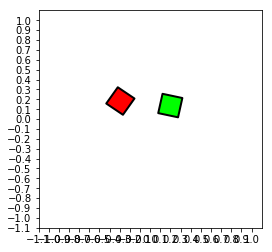

(None, None)
[0.35105909 0.84034252 1.35700539]
[[ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.00; reward = 0.00


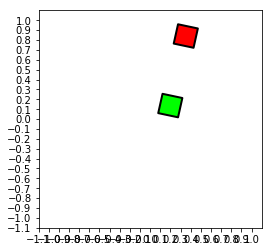

(None, None)
[-0.15350457  0.21311409  1.35700539]
[[ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   1.   0.  -1.   0.  -0.5]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.   0.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 0.  -1.  -1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.   0. ]
 [ 0.   0.  -1.   0.   1.   0.   0. ]
 [ 1.   0.   1.   0.   1.   0.   0. ]]
Progress = 0.85; reward = 0.85


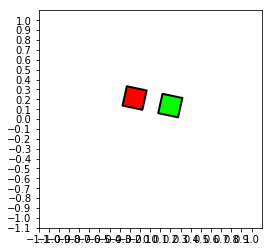

In [49]:
exploration.replay(verbose = True)